Linear Regression for predicting the percentage of a student given the study hours he has spent. 
This is a simple linear regression with just 2 variables.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Read the file

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Analysis of the simple data

To display tail data, that is the last data we use the following

In [3]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


To get statistical info regarding the data we use the following

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


To display the size of data.

In [9]:
data.shape

(25, 2)

# Plotting the data

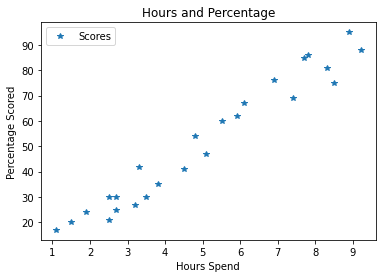

In [10]:
data.plot(x="Hours",y="Scores",style='*')
plt.title("Hours and Percentage")
plt.xlabel("Hours Spend")
plt.ylabel("Percentage Scored")
plt.show()

We can see a positive relationship between the variables x and y that represents 'Hours spend to study' and 'Percentage scored' by each student.This can be solved using Linear Regression.

# Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x=np.asanyarray(data[["Hours"]])
y=np.asanyarray(data[["Scores"]])


#Split the data to train and test data

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)
regressor=LinearRegression()
regressor.fit(train_x,train_y)
print("The coefficient is: ",regressor.coef_)
print("The intercept is: ",regressor.intercept_)
print("We have trained the data now")

The coefficient is:  [[9.94061514]]
The intercept is:  [1.50791048]


# Now its time to plot the linear regression

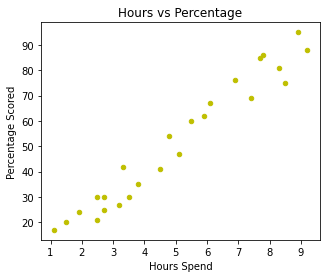

In [17]:
data.plot(kind='scatter',x="Hours",y="Scores",figsize=(5,4),color="y")
#plt.plot(train_x,regressor.coef_[0]*train_x+regressor.intercept_,color='b')
plt.title("Hours vs Percentage")
plt.xlabel('Hours Spend')
plt.ylabel('Percentage Scored')
plt.show()

In above graph you can see the scatter plot of x and y is given and below you can see how we formulate the linear relation using formula y=ax+b. Thus we get the below linear regression line. This blue coloured line makes the best fit within the data.

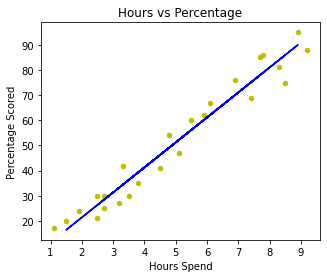

In [18]:
data.plot(kind='scatter',x="Hours",y="Scores",figsize=(5,4),color="y")
plt.plot(train_x,regressor.coef_[0]*train_x+regressor.intercept_,color='b')#line calculating the y value using coef and intercept
plt.title("Hours vs Percentage")
plt.xlabel('Hours Spend')
plt.ylabel('Percentage Scored')
plt.show()

Model Evaluation:Here we need to find the mean absolute error and thus the r2_score which has "1" as the best value.The value shows the accuracy of model.

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score

pred_y=regressor.predict(test_x)
error=metrics.mean_absolute_error(pred_y,test_y)
r2score=r2_score(pred_y,test_y)
print('Mean Absolte Error value is:',error)
print("r2_score is :",r2score)
#Now we can predict the y values for the test data


Mean Absolte Error value is: 4.877039354964484
r2_score is : 0.9753240760240943


{'Actual Values': array([[17],
       [21],
       [24],
       [88],
       [76]], dtype=int64), 'Predicted Values': array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])}


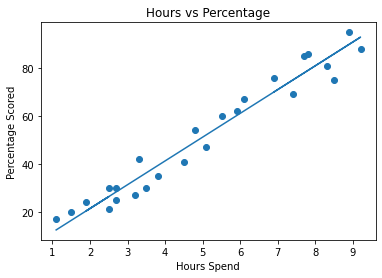

In [46]:
#Predict the y values for the test data and Plot them
test_values={"Actual Values":test_y,"Predicted Values":pred_y}
print(test_values)

plt.scatter(x,y)
plt.plot(test_x,pred_y)
plt.title("Hours vs Percentage")
plt.xlabel('Hours Spend')
plt.ylabel('Percentage Scored')
plt.show()

# We need to predict the score if the student has spend 9.25hrs/day

In [15]:
new_x=9.25
pred_newy=regressor.predict([[new_x]])

print(f'The no of hours is ={new_x}')
print(f'The percentage of score predicted for new_x:={pred_newy}')

The no of hours is =9.25
The percentage of score predicted for new_x:=[[93.45860056]]
